In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

########### mflow ############
import mlflow
import mlflow.sklearn
########### mflow ############

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sharelib import *
from report import *

import logging
from pathlib import Path
import json
import glob
import sys
import pickle

import chart_studio.plotly as py
import plotly.tools as plotly_tools
import plotly.graph_objs as go
from IPython.display import HTML

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

jenkinsURL = getArgs(1,"")
mlflowMinioFolder = getArgs(2,"")
mlflowTrainingFileLimit = int(getArgs(13,10))

# print(mlflowTrainingFileLimit)

In [4]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata7' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        print(file)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)
        if (xcount == mlflowTrainingFileLimit):
            break

xcount:  1
rawdata7\ls.s3.0af212df-82c8-4149-b1d7-067dfac00e4a.2023-10-10T03.20.part124.txt
xcount:  2
rawdata7\ls.s3.0bfc07da-1930-43e1-9d5a-665d91979f17.2023-10-10T13.05.part241.txt
xcount:  3
rawdata7\ls.s3.0cffd4e8-de88-4353-8599-1574309f4640.2023-10-09T20.40.part44.txt
xcount:  4
rawdata7\ls.s3.0dc149ec-96c7-41f9-9aa7-6a030d6aa01a.2023-10-10T03.45.part129.txt
xcount:  5
rawdata7\ls.s3.0e1c4824-480c-40c1-99aa-f4422d574463.2023-10-10T00.40.part92.txt
xcount:  6
rawdata7\ls.s3.0f031eba-d0d4-45e1-add7-28a72d29fd8e.2023-10-10T16.30.part282.txt
xcount:  7
rawdata7\ls.s3.0f96271b-dc78-4c78-b4e7-0df0553fd862.2023-10-10T04.50.part142.txt
xcount:  8
rawdata7\ls.s3.1af0b0ae-7355-48ee-aa45-1edd051f3b54.2023-10-09T19.30.part30.txt
xcount:  9
rawdata7\ls.s3.1b43c223-16d6-4ff7-82a8-0a872480f58b.2023-10-10T02.40.part116.txt
xcount:  10
rawdata7\ls.s3.1b891a1e-ceaf-46d6-b5d1-c5c09b52076e.2023-10-10T18.10.part302.txt


In [16]:
    countryMap = mapOfCountryDst()
    
    print("-------------- Number of Country in Encoding --------------")
    print("country_key : ", len(countryMap.keys()))
    print("country_count : ", len(set(countryMap.values())))
    
    print("-------------- Number of Country in Encoding --------------")    
    print("-------------- Country in Encoding --------------")
    print(countryMap)
    print("-------------- Country in Encoding --------------")    
    print("-------------- Country in Encoding --------------")
    print(countryMap.keys())
    print(countryMap.values())
    print("-------------- Country in Encoding --------------")

    countrylist = listOfCountryDst()
    print("-------------- Number of Country in Encoding --------------")
    print(len(countrylist))
    print("-------------- Number of Country in Encoding --------------")

    for item in countrylist:
        if (item not in countryMap):
            print(item)

-------------- Number of Country in Encoding --------------
country_key :  212
country_count :  208
-------------- Number of Country in Encoding --------------
-------------- Country in Encoding --------------
{'United States': 0, 'US': 0, 'Austria': 1, 'Thailand': 2, 'TH': 2, 'Brazil': 3, 'China': 4, 'Netherlands': 5, 'Singapore': 6, 'SG': 6, 'Japan': 7, 'Sweden': 8, 'United Kingdom': 9, 'Australia': 10, 'Asia Pacific Region': 11, 'Russian Federation': 12, 'Malaysia': 13, 'Korea Republic Of': 14, 'Hong Kong': 15, 'Canada': 16, 'Germany': 17, 'India': 18, 'France': 19, 'Italy': 20, 'Slovakia': 21, 'European Union': 22, 'Norway': 23, 'Ireland': 24, 'Indonesia': 25, 'Spain': 26, 'Israel': 27, 'Taiwan': 28, 'Switzerland': 29, 'South Africa': 30, 'Viet Nam': 31, 'Turkey': 32, 'Lao Peoples Democratic Republic': 33, 'Luxembourg': 34, 'Iran Islamic Republic Of': 35, 'Poland': 36, 'Belgium': 37, 'Mexico': 38, 'Finland': 39, 'Slovenia': 40, 'Argentina': 41, 'Uruguay': 42, 'Czech Republic': 43, 

In [6]:
    np.set_printoptions(threshold=sys.maxsize)
    
    df_categories = df[df["ads_country_dst"].str.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9', '0')) == False] 
    df_categories = pd.concat([df_categories["ads_country_dst"]], axis=1, sort=False,)
    print("-------------- Count Record --------------")
    print(df_categories.shape[0])
    print("-------------- Count Record --------------")
    print("-------------- Count Destination Country --------------")
    print(df_categories.value_counts().to_string())
    print("-------------- Count Destination Country --------------")

    print("-------------- Show Country Not in list --------------")
    print(df_categories[~df_categories['ads_country_dst'].isin(countryMap.keys())].value_counts().to_string())
    print("-------------- Show Country Not in list --------------")

    df_categories = df_categories.mask(~df_categories.isin(countryMap.keys()),'OTHER')

    X = df_categories.replace({'ads_country_dst': countryMap})
    print(X)
    # x_scaler = StandardScaler().fit(X)
    # print("Mean of x is:", x_scaler.mean_)
    # print("Variance of x is:", x_scaler.var_)
    # print("Standard deviation of x is:", x_scaler.scale_)
    # x_scaled = x_scaler.transform(X)
    # print(x_scaled)

-------------- Count Record --------------
63499
-------------- Count Record --------------
-------------- Count Destination Country --------------
ads_country_dst                 
United States                       28464
Austria                             11810
Thailand                             9078
Brazil                               3333
China                                2108
Netherlands                          1574
Japan                                 987
Singapore                             929
Sweden                                818
Australia                             677
United Kingdom                        573
Asia Pacific Region                   368
Canada                                349
Russian Federation                    337
Korea Republic Of                     240
Hong Kong                             208
Malaysia                              200
Germany                               161
France                                144
Slovakia             

In [7]:
# Call and fit the Local Outlier Factor detector
# lof_detector = LocalOutlierFactor(n_neighbors=30, contamination=0.001,novelty=True).fit(x_scaled)
setNNeighbors = int((df_categories.shape[0]/3000))
print("set n_neighbors : " , setNNeighbors)
lof_detector = LocalOutlierFactor(n_neighbors=setNNeighbors, contamination=0.1,novelty=True).fit(X.values)

print("-------------- Model Size (MB) --------------")
print("{:.2f}".format(sys.getsizeof(pickle.dumps(lof_detector))/(1024*1024)))
print("-------------- Model Size (MB) --------------")

# lof_detect = lof_detector.predict(x_scaled)
lof_detect = lof_detector.predict(X)

set n_neighbors :  21
-------------- Model Size (MB) --------------
12.78
-------------- Model Size (MB) --------------


In [8]:
recordDetect,countDetect = np.unique(lof_detect, return_counts=True)
print("--------------Count Anomaly VS Normal-------------")
print(recordDetect)
print(countDetect)

if (len(countDetect) == 1):
    row_to_be_added = countDetect
    countDetect = np.append(np.array([0]),row_to_be_added,axis=0)

print("Anomaly = " , countDetect[0] , "record with " , (countDetect[0])*100/(countDetect[0]+countDetect[1]) ," %")
print("Normal  = " , countDetect[1] , "record with " , (countDetect[1])*100/(countDetect[0]+countDetect[1]) ," %")
print("--------------Count Anomaly VS Normal-------------")
# print(lof_detect)

--------------Count Anomaly VS Normal-------------
[-1  1]
[  140 63359]
Anomaly =  140 record with  0.22047591300650404  %
Normal  =  63359 record with  99.77952408699349  %
--------------Count Anomaly VS Normal-------------


In [9]:
print("-------------- List Destination Country with Prediction -------------")
# print(type(df_categories.value_counts()))
# print(type(df_categories))
for index, value in df_categories.value_counts().items():
    encode = countryMap[index[0]]
    # tempdf = pd.DataFrame([
    #     [encode]
    # ], columns=['ads_country_dst'])
    # predictData = lof_detector.predict(x_scaler.transform(tempdf))
    predictData = lof_detector.predict([[ encode ]])
    print(index[0]  , " | code =" , encode , " | count ="  , value , " | result =" , dataPredictionToString(predictData[0]))

print("-------------- List Destination Country with Prediction -------------")

-------------- List Destination Country with Prediction -------------
United States  | code = 0  | count = 28464  | result = Normally
Austria  | code = 1  | count = 11810  | result = Normally
Thailand  | code = 2  | count = 9078  | result = Normally
Brazil  | code = 3  | count = 3333  | result = Normally
China  | code = 4  | count = 2108  | result = Normally
Netherlands  | code = 5  | count = 1574  | result = Normally
Japan  | code = 7  | count = 987  | result = Normally
Singapore  | code = 6  | count = 929  | result = Normally
Sweden  | code = 8  | count = 818  | result = Normally
Australia  | code = 10  | count = 677  | result = Normally
United Kingdom  | code = 9  | count = 573  | result = Normally
Asia Pacific Region  | code = 11  | count = 368  | result = Normally
Canada  | code = 16  | count = 349  | result = Normally
Russian Federation  | code = 12  | count = 337  | result = Normally
Korea Republic Of  | code = 14  | count = 240  | result = Normally
Hong Kong  | code = 15  | cou

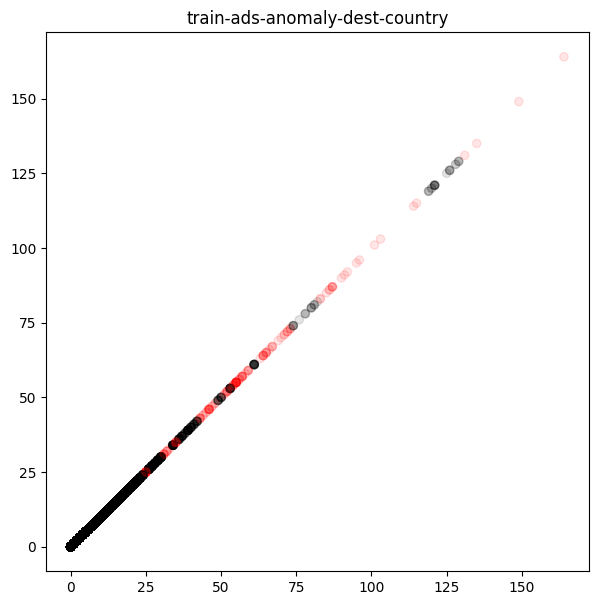

In [10]:
plt.figure(figsize=(7,7))
# plt.scatter(x_scaled[:, 0], x_scaled[:, 0], c=lof_detect, cmap="flag", alpha=0.5)
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 0], c=lof_detect, cmap="flag", alpha=0.1)
plt.title("train-ads-anomaly-dest-country")
plt.savefig('train-ads-anomaly-dest-country.png')
plt.show()

In [11]:
summary_table_1 = X.describe().to_html()\
    .replace('<table border="1" class="dataframe">','<table class="table table-striped">') # use bootstrap styling
print(summary_table_1)

<table class="table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ads_country_dst</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>63499.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>2.400432</td>
    </tr>
    <tr>
      <th>std</th>
      <td>5.811770</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>2.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>164.000000</td>
    </tr>
  </tbody>
</table>


In [12]:
summary_table_2 = '''<table class="table table-striped">
<th>Ticker</th>
<tr>
    <td><img src="train-ads-anomaly-dest-country.png" alt="train-ads-anomaly-dest-country.png"></td>
</tr>
</table>
'''
# HTML(summary_table_2)

print(summary_table_2)

<table class="table table-striped">
<th>Ticker</th>
<tr>
    <td><img src="train-ads-anomaly-dest-country.png" alt="train-ads-anomaly-dest-country.png"></td>
</tr>
</table>



In [13]:
html_string = mainReportHTML(summary_table_1,summary_table_2)

In [14]:
f = open('report.html','w')
f.write(html_string)
f.close()

In [17]:
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000
# %set_env MLFLOW_TRACKING_URI=http://mlflow.rtarf-ml.its-software-services.com/
tracking_uri = os.environ["MLFLOW_TRACKING_URI"]
# export MLFLOW_TRACKING_USERNAME=user 
# export MLFLOW_TRACKING_PASSWORD=pwd

experiment = mlflow.set_experiment(experiment_name='ads-anomaly-dest-country')
experiment_id = experiment.experiment_id

run_description = f"""
### Note
**All information** * about Training * ~~ML here~~ .
Jenkins URL: [{jenkinsURL}]({jenkinsURL})
"""

with mlflow.start_run(experiment_id=experiment_id,description=run_description):
    mlflow.set_tracking_uri(tracking_uri)
    
    mlflow.MLFLOW_ARTIFACT_UPLOAD_DOWNLOAD_TIMEOUT(6000)
    print("Artifact Location: {}".format(experiment.artifact_location))
    print("artifact uri : " + mlflow.get_artifact_uri())

    mlflow.doctor()
    mlflow.log_param("MlflowMinioFolder", mlflowMinioFolder)
    mlflow.log_param("country_key", len(countryMap.keys()))
    mlflow.log_param("country_count", len(set(countryMap.values())))

    mlflow.log_param("SampleFile", xcount)
    mlflow.log_param("SampleRows", X.shape[0])
    # mlflow.set_tag("JenkinsURL",jenkinsURL)

    mlflow.log_metric("Anomaly", str((countDetect[0])*100/(countDetect[0]+countDetect[1])))
    mlflow.log_metric("Normal", str((countDetect[1])*100/(countDetect[0]+countDetect[1])))
    mlflow.sklearn.log_model(lof_detector, "model", registered_model_name="ads-anomaly-by-dest-country")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)


print("-------------- Model save success -------------")

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000


AttributeError: module 'mlflow' has no attribute 'MLFLOW_ARTIFACT_UPLOAD_DOWNLOAD_TIMEOUT'

In [10]:
!mlflow models serve -m mlflow-artifacts:/394149324160139362/f188152b48494d1c86de6a4f8397908d/artifacts/model -p 1234 --no-conda

^C


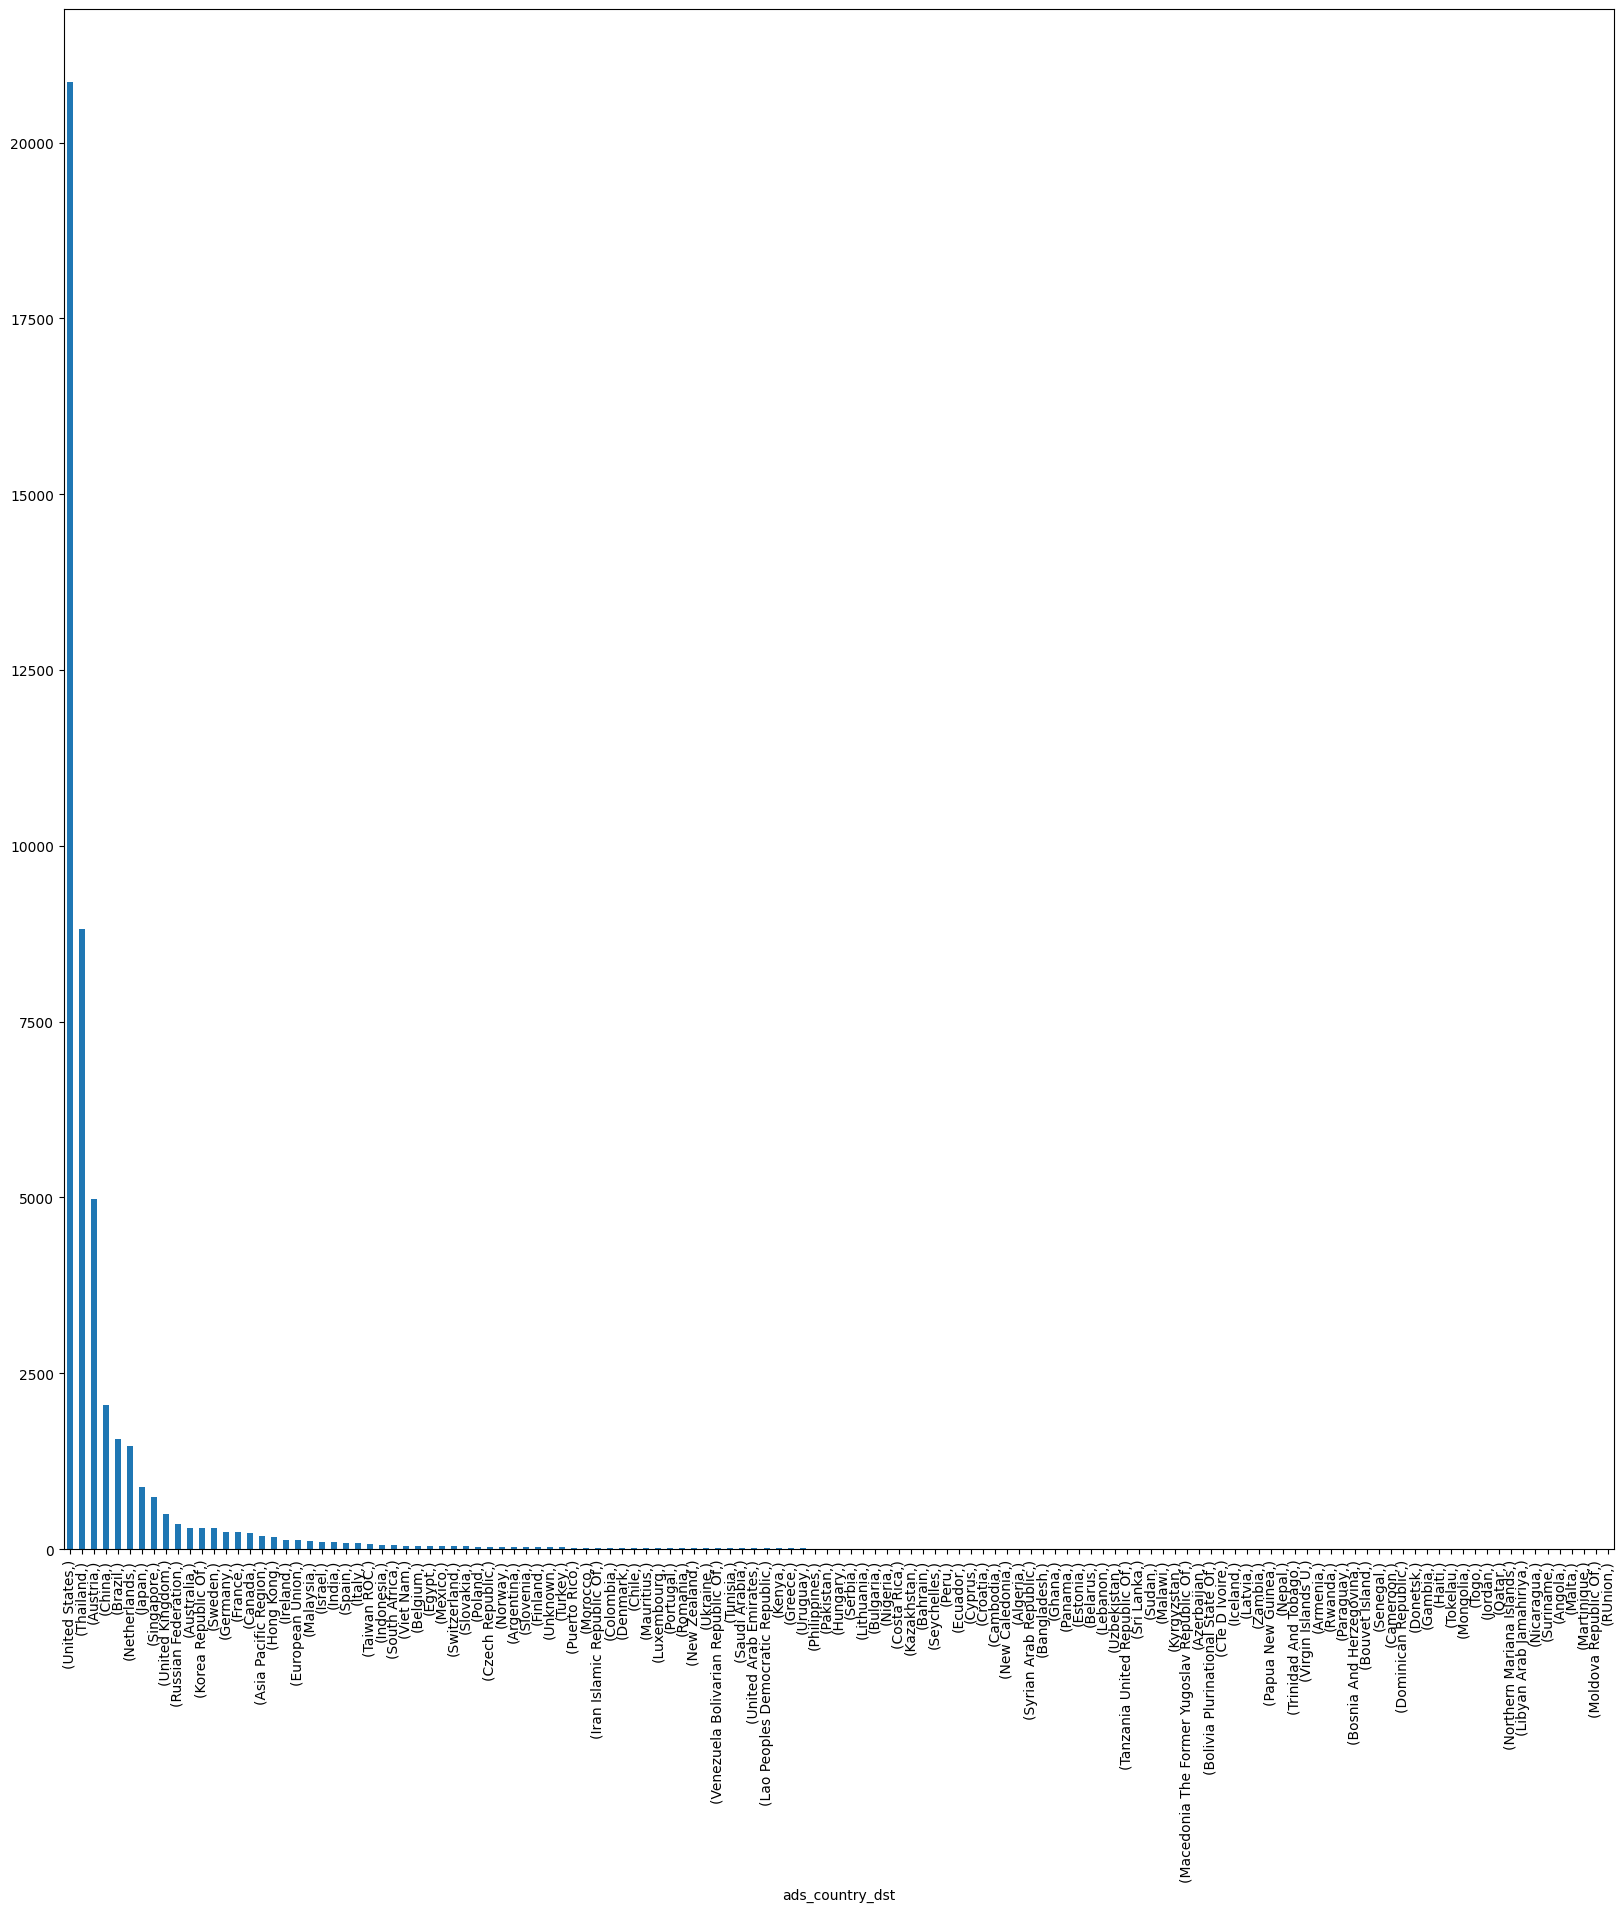

In [ ]:
# Plot the conparison between actual and predicted y
df_categories.value_counts()[: :].plot(kind="bar", figsize=(20,20))
plt.show()